In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from PIL import Image

# Import DATASET
## UTK-Face
Dataset downloaded from: https://susanqq.github.io/UTKFace/

https://www.kaggle.com/code/mohamadserawan/demographics-classifications/notebook

https://www.kaggle.com/code/asser37/mtl-age-gender-ethnicity

In [2]:
ds_path = 'C:/0_thesis/dataset/UTKFace-wild/'
csv_path = 'C:/0_thesis/dataset/'
filename_csv = 'utkface-wild-data.csv'

## Analysis: observe the balance in the dataset of gender, age, and ethnicity 

In [3]:
df = pd.read_csv(csv_path + filename_csv)
n_tot_images = df.shape[0]
df.head()

,filename,filepath,age,gender,ethnicity,age-group
0,100_0_0_20170112213500903.jpg,C:/0_thesis/dataset/UTKFace-wild/100_0_0_20170...,100,male,white,11
1,100_0_0_20170112215240346.jpg,C:/0_thesis/dataset/UTKFace-wild/100_0_0_20170...,100,male,white,11
2,100_1_0_20170110183726390.jpg,C:/0_thesis/dataset/UTKFace-wild/100_1_0_20170...,100,female,white,11
3,100_1_0_20170112213001988.jpg,C:/0_thesis/dataset/UTKFace-wild/100_1_0_20170...,100,female,white,11
4,100_1_0_20170112213303693.jpg,C:/0_thesis/dataset/UTKFace-wild/100_1_0_20170...,100,female,white,11


In [4]:
n_tot_images

23602

In [5]:
df.columns

Index(['filename', 'filepath', 'age', 'gender', 'ethnicity', 'age-group'], dtype='object')

### Gender

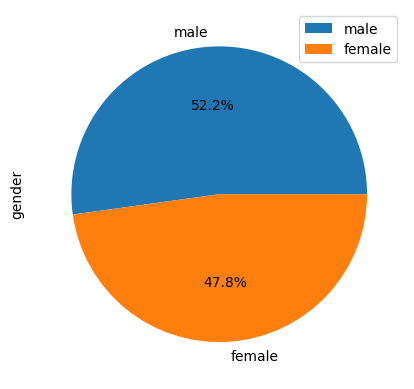

In [6]:
df['gender'].value_counts().plot.pie(autopct="%1.1f%%", labels=['male', 'female'])
plt.legend()

In [7]:
df['gender'].value_counts()

male      12320
female    11282
Name: gender, dtype: int64

### Ethnicity

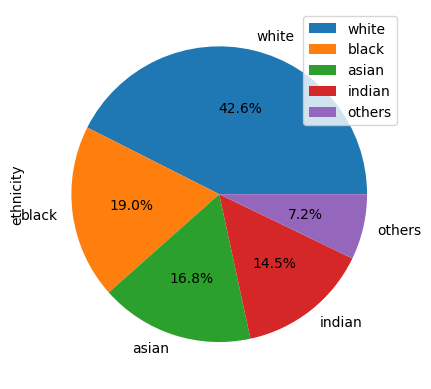

In [8]:
df['ethnicity'].value_counts().plot.pie(autopct="%1.1f%%", labels=['white', 'black', 'asian', 'indian', 'others'])
plt.legend()

### Age

Text(0, 0.5, 'count')

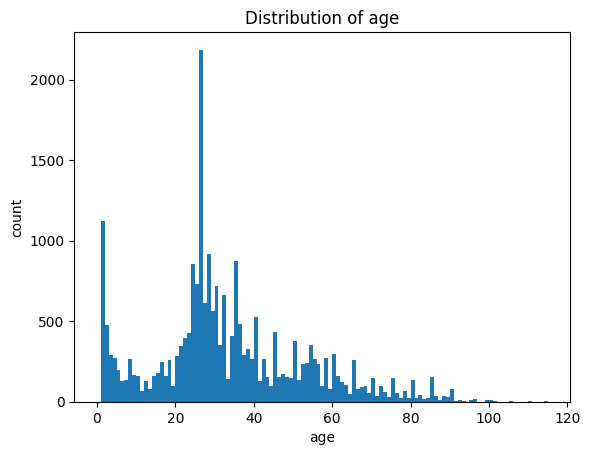

In [9]:
#df['age'].hist(rwidth=0.7)
plt.hist(df['age'], range(116))
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('count')

In [10]:
# age
# https://www.researchgate.net/publication/228404297_Classification_of_Age_Groups_Based_on_Facial_Features/figures?lo=1
from age_groups import *

ranges = AgeGroups().getRanges()

print("The percentage of images to the total in ")
count_age_ranges = []
for r in ranges:
    count_age_range = sum([len(df[df.age == j]) for j in r])
    count_age_ranges.append(count_age_range)
    print(r, "years:", round(count_age_range/n_tot_images*100,2), " %")

The percentage of images to the total in 
range(0, 3) years: 6.79  %
range(3, 13) years: 7.64  %
range(13, 20) years: 4.98  %
range(20, 30) years: 30.97  %
range(30, 40) years: 19.17  %
range(40, 50) years: 9.47  %
range(50, 60) years: 9.69  %
range(60, 70) years: 5.57  %
range(70, 80) years: 2.92  %
range(80, 90) years: 2.11  %
range(90, 100) years: 0.56  %
range(100, 117) years: 0.13  %


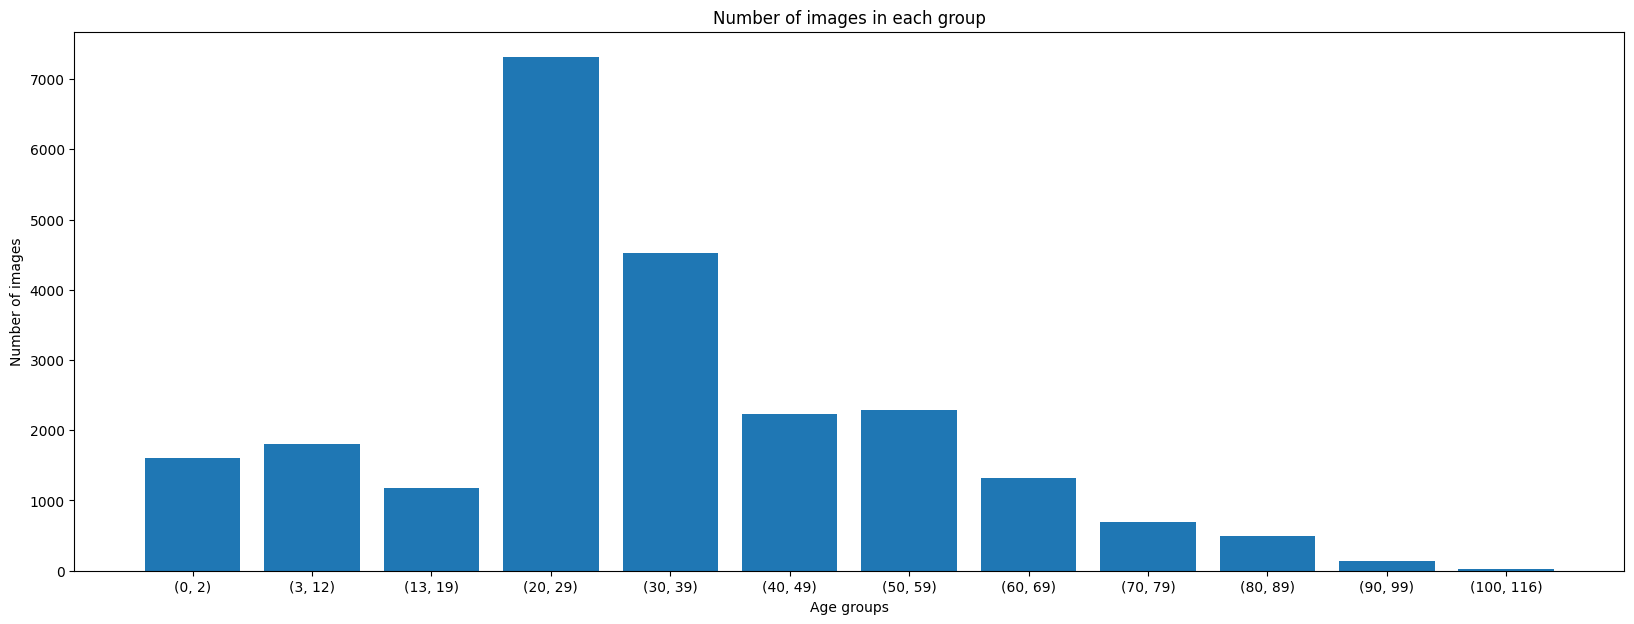

In [11]:
# Show a plot with the age distribution
ranges_axis = []

for r in ranges:
    ranges_axis.append("("+str(min(r))+", "+str(max(r))+")")

x_pos = np.arange(len(count_age_ranges))
fig = plt.figure(dpi=100, figsize=(20, 7)) 
plt.bar(x_pos, count_age_ranges, align='center')
plt.xticks(x_pos, ranges_axis)
plt.ylabel('Number of images')
plt.xlabel('Age groups')
plt.title('Number of images in each group')
plt.show()

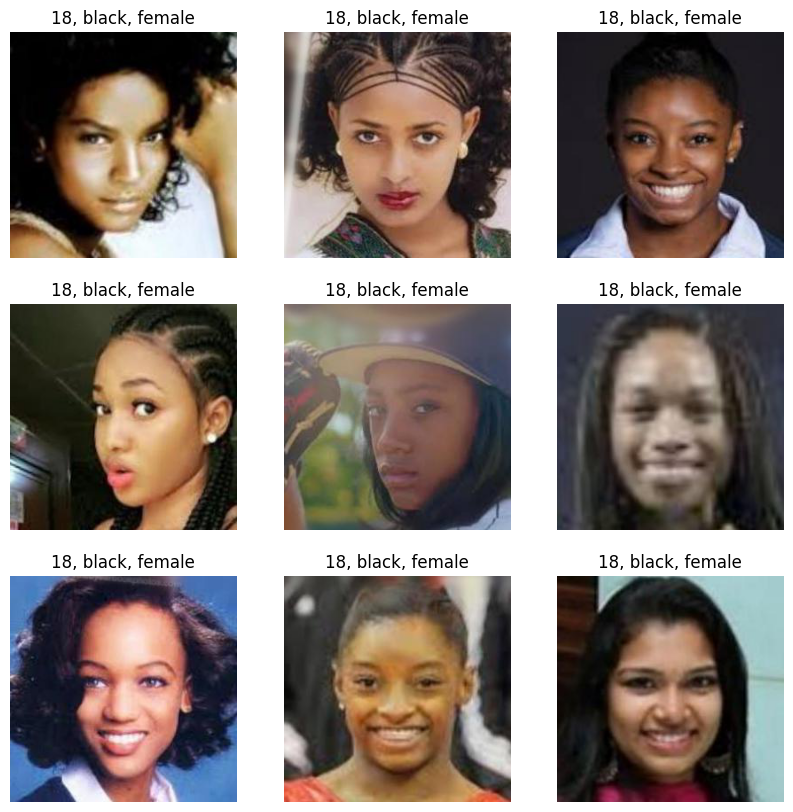

In [12]:
plt.figure(figsize=(10,10))
range_start = 1400
range_end = range_start+9
for i in range(range_start, range_end):
    sample = df.loc[i]
    plt.subplot(3,3,i+1-range_start)
    plt.axis('off')
    # with gender and ethnicity in number
    # plt.title('%i, %s, %s' % (sample.age,ethnicity_mapper[sample.ethnicity],gender_mapper[sample.gender]))
    # with gender and ethnicity in label
    plt.title('%i, %s, %s' % (sample.age, sample.ethnicity, sample.gender))
    plt.imshow(Image.open(ds_path + sample.filename))
    #plt.imshow(Image.open(sample.filepath))